## Preprocessing and Naive-Bayes

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Pre-Processing to remove unnecessary columns and restricting the values to analyzable ranges.

In [2]:
capture_34_dataset = "D:/Course_Content/2ES/IOT_IDS/Model/CTU-IoT-Malware-Capture-34-1/conn.log.labeled"
df_34 = pd.read_table(filepath_or_buffer=capture_34_dataset, skiprows=10, nrows=100000)
df_34.columns=['ts',
              'uid',
              'id.orig_h',
              'id.orig_p',
              'id.resp_h',
              'id.resp_p',
              'proto',
              'service',
              'duration',
              'orig_bytes',
              'resp_bytes',
              'conn_state',
              'local_orig',
              'local_resp',
              'missed_bytes',
              'history',
              'orig_pkts',
              'orig_ip_bytes',
              'resp_pkts',
              'resp_ip_bytes',
              'label']

df_34.drop(df_34.tail(1).index,inplace=True)

frames=[df_34]
df_c=pd.concat(frames)

In [3]:
df_c

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1545403848.981338,CDrkrSobGYxHhYfth,192.168.1.195,41040.0,185.244.25.235,80.0,tcp,http,1.477656,149,...,SF,-,-,2896.0,ShADadttcfF,94.0,5525.0,96.0,139044.0,- Benign -
1,1545403850.554283,CTWZQf2oJSvq6zmPAc,192.168.1.195,41042.0,185.244.25.235,80.0,tcp,-,3.147116,0,...,S0,-,-,0.0,S,3.0,180.0,0.0,0.0,- Benign -
2,1545403857.781320,CvyynC4Sabj9BNXFRi,192.168.1.195,41042.0,185.244.25.235,80.0,tcp,http,1.305004,151,...,SF,-,-,5792.0,ShADadttcfF,96.0,5699.0,92.0,133140.0,- Benign -
3,1545403859.183341,CWYyiA2sgRijwk2jEd,192.168.1.195,41044.0,185.244.25.235,80.0,tcp,http,1.004605,148,...,SF,-,-,2896.0,ShADadtcfF,67.0,4148.0,65.0,92453.0,- Benign -
4,1545403860.282392,CYttPy2pqOIcen7UDh,192.168.1.195,41046.0,185.244.25.235,80.0,tcp,http,4.129647,148,...,SF,-,-,5792.0,ShADadtcfF,75.0,4412.0,69.0,97107.0,- Benign -
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23137,1545490133.961380,C2F17zSUnGOcWzBa7,192.168.1.195,57110.0,185.244.25.235,6667.0,tcp,irc,32.840994,62,...,S3,-,-,0.0,ShAdDaf,7.0,434.0,6.0,589.0,- Malicious C&C
23138,1545489934.221598,C93P4z4k5IRJD1rXJg,192.168.1.195,57092.0,185.244.25.235,6667.0,tcp,irc,36.290833,62,...,S3,-,-,0.0,ShAdDaf,10.0,606.0,7.0,632.0,- Malicious C&C
23139,1545490198.463564,CXLZ3A2QY5E8weqpDk,192.168.1.195,123.0,147.251.48.140,123.0,udp,-,-,-,...,S0,-,-,0.0,D,1.0,76.0,0.0,0.0,- Benign -
23140,1545490181.542213,CuXpFN3fWesWBXUhq1,192.168.1.195,123.0,82.113.53.40,123.0,udp,-,-,-,...,S0,-,-,0.0,D,1.0,76.0,0.0,0.0,- Benign -


In [4]:
df_c['label'].value_counts()

-   Malicious   DDoS                         14394
-   Malicious   C&C                           6706
-   Benign   -                                1920
-   Malicious   PartOfAHorizontalPortScan      122
Name: label, dtype: int64

In [5]:
df_c.loc[(df_c.label == '-   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_c.loc[(df_c.label == '(empty)   Malicious   PartOfAHorizontalPortScan'), 'label'] = 'PartOfAHorizontalPortScan'
df_c.loc[(df_c.label == '-   Malicious   Okiru'), 'label'] = 'Okiru'
df_c.loc[(df_c.label == '(empty)   Malicious   Okiru'), 'label'] = 'Okiru'
df_c.loc[(df_c.label == '-   Benign   -'), 'label'] = 'Benign'
df_c.loc[(df_c.label == '(empty)   Benign   -'), 'label'] = 'Benign'
df_c.loc[(df_c.label == '-   Malicious   DDoS'), 'label'] = 'DDoS'
df_c.loc[(df_c.label == '-   Malicious   C&C'), 'label'] = 'C&C'
df_c.loc[(df_c.label == '(empty)   Malicious   C&C'), 'label'] = 'C&C'
df_c.loc[(df_c.label == '-   Malicious   Attack'), 'label'] = 'Attack'
df_c.loc[(df_c.label == '(empty)   Malicious   Attack'), 'label'] = 'Attack'
df_c.loc[(df_c.label == '-   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_c.loc[(df_c.label == '(empty)   Malicious   C&C-HeartBeat'), 'label'] = 'C&C-HeartBeat'
df_c.loc[(df_c.label == '-   Malicious   C&C-FileDownload'), 'label'] = 'C&C-FileDownload'
df_c.loc[(df_c.label == '-   Malicious   C&C-Torii'), 'label'] = 'C&C-Torii'
df_c.loc[(df_c.label == '-   Malicious   C&C-HeartBeat-FileDownload'), 'label'] = 'C&C-HeartBeat-FileDownload'
df_c.loc[(df_c.label == '-   Malicious   FileDownload'), 'label'] = 'FileDownload'
df_c.loc[(df_c.label == '-   Malicious   C&C-Mirai'), 'label'] = 'C&C-Mirai'
df_c.loc[(df_c.label == '-   Malicious   Okiru-Attack'), 'label'] = 'Okiru-Attack'

In [6]:
df_c['label'].value_counts()

DDoS                         14394
C&C                           6706
Benign                        1920
PartOfAHorizontalPortScan      122
Name: label, dtype: int64

In [7]:
df_c = df_c.drop(columns=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p', 'service','local_orig','local_resp','history'])

In [8]:
df_c = pd.get_dummies(df_c, columns=['proto'])
df_c = pd.get_dummies(df_c, columns=['conn_state'])

In [9]:
df_c

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_tcp,proto_udp,conn_state_OTH,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S3,conn_state_SF
0,1.477656,149,128252,2896.0,94.0,5525.0,96.0,139044.0,Benign,1,0,0,0,0,0,0,1
1,3.147116,0,0,0.0,3.0,180.0,0.0,0.0,Benign,1,0,0,0,1,0,0,0
2,1.305004,151,128348,5792.0,96.0,5699.0,92.0,133140.0,Benign,1,0,0,0,0,0,0,1
3,1.004605,148,91961,2896.0,67.0,4148.0,65.0,92453.0,Benign,1,0,0,0,0,0,0,1
4,4.129647,148,99303,5792.0,75.0,4412.0,69.0,97107.0,Benign,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23137,32.840994,62,269,0.0,7.0,434.0,6.0,589.0,C&C,1,0,0,0,0,0,1,0
23138,36.290833,62,260,0.0,10.0,606.0,7.0,632.0,C&C,1,0,0,0,0,0,1,0
23139,-,-,-,0.0,1.0,76.0,0.0,0.0,Benign,0,1,0,0,1,0,0,0
23140,-,-,-,0.0,1.0,76.0,0.0,0.0,Benign,0,1,0,0,1,0,0,0


In [10]:
df_c['duration'] = df_c['duration'].str.replace('-','0')
df_c['orig_bytes'] = df_c['orig_bytes'].str.replace('-','0')
df_c['resp_bytes'] = df_c['resp_bytes'].str.replace('-','0')
df_c

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_tcp,proto_udp,conn_state_OTH,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S3,conn_state_SF
0,1.477656,149,128252,2896.0,94.0,5525.0,96.0,139044.0,Benign,1,0,0,0,0,0,0,1
1,3.147116,0,0,0.0,3.0,180.0,0.0,0.0,Benign,1,0,0,0,1,0,0,0
2,1.305004,151,128348,5792.0,96.0,5699.0,92.0,133140.0,Benign,1,0,0,0,0,0,0,1
3,1.004605,148,91961,2896.0,67.0,4148.0,65.0,92453.0,Benign,1,0,0,0,0,0,0,1
4,4.129647,148,99303,5792.0,75.0,4412.0,69.0,97107.0,Benign,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23137,32.840994,62,269,0.0,7.0,434.0,6.0,589.0,C&C,1,0,0,0,0,0,1,0
23138,36.290833,62,260,0.0,10.0,606.0,7.0,632.0,C&C,1,0,0,0,0,0,1,0
23139,0,0,0,0.0,1.0,76.0,0.0,0.0,Benign,0,1,0,0,1,0,0,0
23140,0,0,0,0.0,1.0,76.0,0.0,0.0,Benign,0,1,0,0,1,0,0,0


In [11]:
df_c.fillna(-1,inplace=True)
check=df_c.isna().sum()
check

duration           0
orig_bytes         0
resp_bytes         0
missed_bytes       0
orig_pkts          0
orig_ip_bytes      0
resp_pkts          0
resp_ip_bytes      0
label              0
proto_tcp          0
proto_udp          0
conn_state_OTH     0
conn_state_RSTR    0
conn_state_S0      0
conn_state_S1      0
conn_state_S3      0
conn_state_SF      0
dtype: int64

In [12]:
df_c

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,proto_tcp,proto_udp,conn_state_OTH,conn_state_RSTR,conn_state_S0,conn_state_S1,conn_state_S3,conn_state_SF
0,1.477656,149,128252,2896.0,94.0,5525.0,96.0,139044.0,Benign,1,0,0,0,0,0,0,1
1,3.147116,0,0,0.0,3.0,180.0,0.0,0.0,Benign,1,0,0,0,1,0,0,0
2,1.305004,151,128348,5792.0,96.0,5699.0,92.0,133140.0,Benign,1,0,0,0,0,0,0,1
3,1.004605,148,91961,2896.0,67.0,4148.0,65.0,92453.0,Benign,1,0,0,0,0,0,0,1
4,4.129647,148,99303,5792.0,75.0,4412.0,69.0,97107.0,Benign,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23137,32.840994,62,269,0.0,7.0,434.0,6.0,589.0,C&C,1,0,0,0,0,0,1,0
23138,36.290833,62,260,0.0,10.0,606.0,7.0,632.0,C&C,1,0,0,0,0,0,1,0
23139,0,0,0,0.0,1.0,76.0,0.0,0.0,Benign,0,1,0,0,1,0,0,0
23140,0,0,0,0.0,1.0,76.0,0.0,0.0,Benign,0,1,0,0,1,0,0,0


In [13]:
df_c['label'].value_counts()

DDoS                         14394
C&C                           6706
Benign                        1920
PartOfAHorizontalPortScan      122
Name: label, dtype: int64

In [14]:
for col in df_c.columns: 
    print(col) 

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
proto_tcp
proto_udp
conn_state_OTH
conn_state_RSTR
conn_state_S0
conn_state_S1
conn_state_S3
conn_state_SF


In [15]:
X = df_c[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_tcp', 'proto_udp', 'conn_state_OTH', 'conn_state_RSTR', 'conn_state_S0', 'conn_state_S1', 'conn_state_S3', 'conn_state_SF']]
Y = df_c['label']

## Random Forest for IOT-23 Dataset with CTU-IoT-Malware-Capture-34-1 (Mirai)

In [19]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9894145603802117


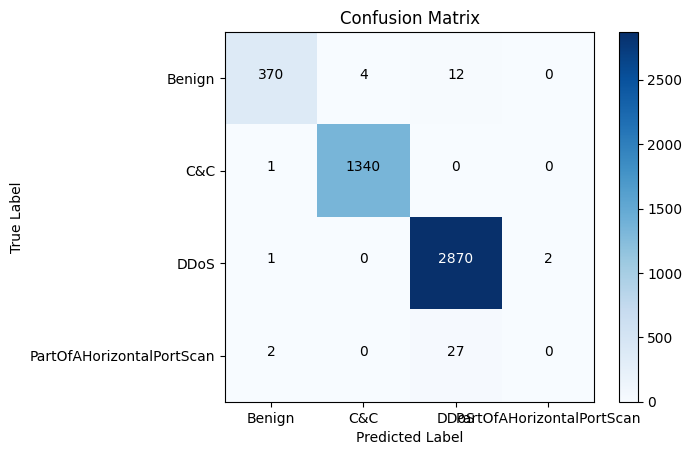

In [20]:
confusion_mat = confusion_matrix(y_test, y_pred)
# print(confusion_mat)
classes = ['Benign', 'C&C', 'DDoS', 'PartOfAHorizontalPortScan']
# Plot the confusion matrix
plt.imshow(confusion_mat, cmap=plt.cm.Blues)

# Add labels, title, and colorbar
plt.title('Confusion Matrix')
plt.colorbar()

# Set the tick marks and labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Set the axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the values inside the matrix
thresh = confusion_mat.max() / 2.0
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.text(j, i, confusion_mat[i, j],
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > thresh else "black")

# Show the plot
plt.show()